In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

url = 'https://raw.githubusercontent.com/kabhamajd/Course_assignment/main/Book1.csv'
Adata= pd.read_csv(url)
Adata.drop(['CANCELLATION_REASON', 'CANCELLED' , 'DIVERTED'], axis=1, inplace=True)
Adata.head(5)


,ID,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,538600,2021,5,18,1,OO,2898,N866AS,LAX,SMF,1030,1027,-3.0,18,1045,86.0,63.0,373,1156
1,4490363,2021,3,31,2,DL,228,N945DL,MCO,CVG,1321,1315,-6.0,10,1325,129.0,119.0,757,1530
2,1735082,2021,6,23,2,DL,1812,N955DN,ATL,ORD,2205,2210,5.0,19,2229,123.0,89.0,606,2308
3,3038666,2021,11,20,5,EV,4869,N738EV,DTW,TVC,1200,1156,-4.0,12,1208,67.0,43.0,207,1307
4,636474,2021,3,4,3,UA,283,N549UA,SFO,IAH,601,557,-4.0,15,612,223.0,196.0,1635,1144


# הבאנו את הספריות שנצטרך וגם מחקנו שלוש עמודות מכיוון שהן אינן מכילות ערכים כלשהם בנתונים המקוריים, כך שלא היה צורך בהן מכיוון שאין להן השפעה על התוצאות. בנוסף, הצגנו חמש שורות הנתונים הראשונות.
* FLIGHT_NUMBER=מספר טיסה
* TAIL_NUMBER=מספר רישום המטוס
* ORIGIN_AIRPORT=שדה תעופה תחיל תטיסה
* DESTINATION_AIRPORT=שדה תעופה של הגעה
* SCHEDULED_DEPARTURE=זמן היציאה המדויק
* DEPARTURE_TIME=זמן היציאה בפועל
* DEPARTURE_DELAY=זמן האיחור
* TAXI_OUT=הזמן בו המטוס נע על הקרקע
* WHEELS_OFF=זמן התחלת הרחִיפה
* SCHEDULED_TIME=זמן הטיסה המדויק
* AIR_TIME=זמן טיסה 
* SCHEDULED_ARRIVAL=זמו גישה המדויק

In [14]:
Adata.dtypes

ID                       int64
YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME           int64
DEPARTURE_DELAY        float64
TAXI_OUT                 int64
WHEELS_OFF               int64
SCHEDULED_TIME         float64
AIR_TIME               float64
DISTANCE                 int64
SCHEDULED_ARRIVAL        int64
dtype: object

# סוג הנתונים בכל העמודות

In [15]:
data=Adata.dropna()

# מחיקת את השורות עם נתונים חסרים כך שהתוצאות יהיו מדויקות

In [16]:
data_missing_values = pd.isnull(data)
data.isnull().sum()
pd.isnull(data).sum()

ID                     0
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
AIR_TIME               0
DISTANCE               0
SCHEDULED_ARRIVAL      0
dtype: int64

# מספר השורות המכילות נתונים חסרים בכל עמודה

In [17]:
rows_number = len(data.axes[0])
columsn_number = len(data.axes[1])
print("Number of Rows: " + str(rows_number))
print("Number of Columns: " + str(columsn_number))

Number of Rows: 19999
Number of Columns: 19


מספר השורות והעמודות

In [18]:
print("Max Distance (in kilometer) : " , data['DISTANCE'].max())

Max Distance (in kilometer) :  4983


In [66]:
print("Min Distance (in kilometer) : " , data['DISTANCE'].min())

Min Distance (in kilometer) :  41


In [20]:
print("Mean Distance (in kilometer) : " , data['DISTANCE'].mean())

Mean Distance (in kilometer) :  823.5823791189559


In [21]:
data1=(data['AIR_TIME'].max())/60
print("Max Air Time ( in houers): " , data1)

Max Air Time ( in houers):  10.6


In [247]:
data2=data[['MONTH','DEPARTURE_DELAY', 'TAXI_OUT' , 'AIR_TIME' , 'DISTANCE' , 'SCHEDULED_TIME']] 

data2.max()


MONTH                12.0
DEPARTURE_DELAY    1106.0
TAXI_OUT            129.0
AIR_TIME            636.0
DISTANCE           4983.0
SCHEDULED_TIME      640.0
dtype: float64

# הצגת הערך הגדול ביותר בכל עמודה

In [253]:
import matplotlib.pyplot as plt

speed=(data['DISTANCE']/data['AIR_TIME'])*60
data['AIRPLANE_SPEED'] =speed

AIRLIN_MEAN_SPEED= data.groupby('AIRLINE')[['AIRPLANE_SPEED' ]].mean().sort_values(by='AIRPLANE_SPEED', ascending=False)

AIRLIN_MEAN_SPEED


,AIRPLANE_SPEED
AIRLINE,
F9,447.236217
UA,447.038310
VX,439.782221
NK,436.097514
AS,435.503246
AA,427.989664
B6,421.862989
DL,419.241008
WN,414.513563


 # חישבנו את המהירות על ידי חלוקת המרחק לפי זמן ומכיוון שהזמן היה בדקות, הכפלנו את התוצאה בשישים 
 # חישבנו את המהירות הממוצעת עבור כל חברת תעופה
# Frontier Airlines מכאן נראה שחברה
# יש להם המטוסים המהירות ביותר, ואנחנו יכולים להסיק מכך שהיא בעלת המטוסים החדשים ביותר

<AxesSubplot:xlabel='AIRLINE'>

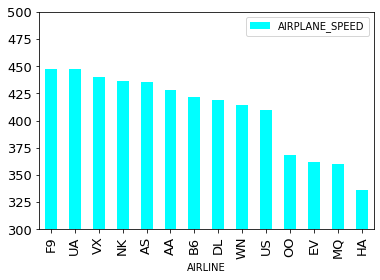

In [288]:
AIRLIN_MEAN_SPEED.plot(kind="bar", ylim=(300,500) , fontsize=13 , color = "aqua")


<AxesSubplot:ylabel='AIRLINE'>

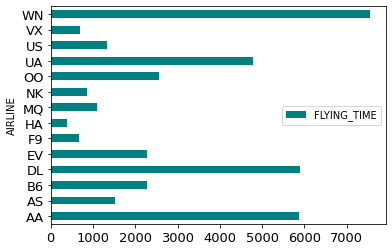

In [274]:
FLYING_TIME=(data['AIR_TIME']/60)
data['FLYING_TIME'] =FLYING_TIME
data.head(5)
FLIYUNG_TIME_A = data.groupby('AIRLINE')[['FLYING_TIME']].sum()
FLIYUNG_TIME_A.plot(kind="barh", fontsize=13 , color = "teal")

# חישבנו את מספר שעות הטיסה עבור כל חברה וחילקנו אותה ב 60 מכיוון ש ב הנתונים זמן הטיסה נרשם בדקות וזה לא רלוונטי לנו
# Southwest Airlines
# The biggest flight time

Text(0.5, 1.0, 'Number of flights')

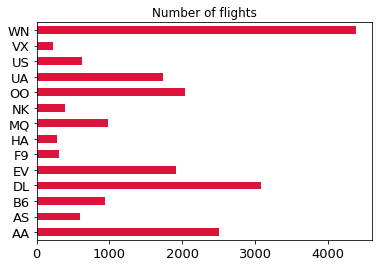

In [282]:
fm_df = pd.get_dummies(data['AIRLINE'])
a=fm_df.sum().sort_index()
a.plot(kind="barh", fontsize=13 , color = "crimson")
plt.title('Number of flights')

# התרשים מציג את מספר הטיסות לכל חברה
# אנו רואים שיש עקביות בתוצאות, מכיוון שזו חברת התעופה שיש לה הכי הרבה שעות טיסה והיא זו עם מספר הטיסות הגדול ביותר

In [174]:
DELAY=(data['DEPARTURE_DELAY']/60)
data['DEPARTURE_DELAY_H'] =DELAY

b=data.groupby('AIRLINE')[['DEPARTURE_DELAY_H']].sum()
b.sort_values( by="DEPARTURE_DELAY_H", ascending=False)
b.plot(kind="barh", fontsize=13 , color = "lime")

,DEPARTURE_DELAY_H
AIRLINE,
WN,748.150000
UA,426.933333
AA,422.850000
DL,328.750000
OO,269.383333
EV,264.233333
MQ,203.916667
B6,158.350000
NK,109.483333


# חישבנו את משך העיכוב הכולל עבור כל טיסה של חברת התעופה
# ראוי לציין שזמן העיכוב הגדול של החברה לא הופך אותה לגרועה ביותר, מכיוון שהיא עשתה יותר טיסות .

<AxesSubplot:ylabel='AIRLINE'>

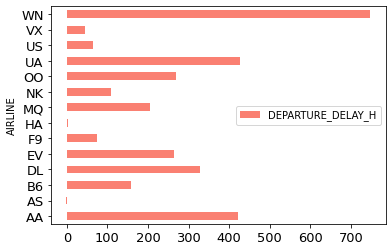

In [275]:
b.plot(kind="barh", fontsize=13 , color = "salmon")

# גרף זמן עיכוב

In [177]:
TAXI_OUT=(data['TAXI_OUT']/60)
data['TAXI_OUT_H'] =TAXI_OUT

c=data.groupby('ORIGIN_AIRPORT')[['TAXI_OUT_H']].sum()
c.sort_values( by="TAXI_OUT_H", ascending=False)


,TAXI_OUT_H
ORIGIN_AIRPORT,
ATL,344.050000
ORD,307.416667
DFW,231.750000
LAX,193.050000
DEN,172.583333
...,...
WRG,0.100000
11980,0.100000
10739,0.083333


# כפי שהוסבר בעבר, זה הזמן שלוקח מתחילת הטיסה ועד להמראה. ניתן להסביר את הזמן הארוך בכך ששדה התעופה צפוף מאוד או שהמסלול ארוך
# ATL=Atlanta Airport
# ואכן, כפי שהסקנו, שדה התעופה זה הוא אחד העמוסים בעולם

In [301]:
fm_df = pd.get_dummies(data['MONTH'])
FLIGHT_MONTH=fm_df.sum().sort_index()
FLIGHT_MONTH

1     1664
2     1438
3     1705
4     1631
5     1744
6     1693
7     1794
8     1764
9     1644
10    1709
11    1631
12    1582
dtype: int64

# מספר הטיסות בחודש

<AxesSubplot:>

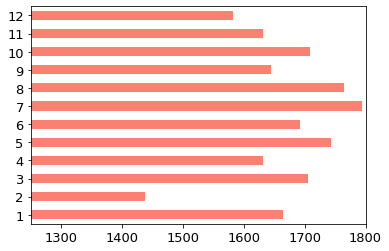

In [300]:
FLIGHT_MONTH.plot(kind="barh", fontsize=13, xlim=(1250,1800) , color = "gold")

# אנו רואים שמספר הנסיעות הוא הגבוה ביותר בחודש יולי, וזה מוצדק מכיוון שזו תקופת חופשות לאוניברסיטאות ובתי ספר.

In [235]:
features = [ 'DEPARTURE_DELAY','DISTANCE', 'AIR_TIME']
X = data[melbourne_features]
y = data['MONTH']

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=40)



In [236]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)
test=model.predict(X_test.head())


In [237]:
eval(X_test,y_test,model)

MSE: 4.864


# מצאנו את טעות ריבועית ממוצעת והיא קטנה זה אומר הטעויות במודל נמוכות

In [245]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
ac= sk.tree.DecisionTreeClassifier(random_state=0)
ac.fit(X_train, y_train)
pred = ac.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)
acc    

0.08933333333333333